<a href="https://colab.research.google.com/github/swarubm/Deep-Learning/blob/main/DL10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction - LSTM Time Series Analysis

/tmp/ipython-input-2155235977.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0681 - val_loss: 0.0042
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0098 - val_loss: 0.0051
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0065 - val_loss: 0.0024
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0047 - val_loss: 0.0024
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0039 - val_loss: 0.0026


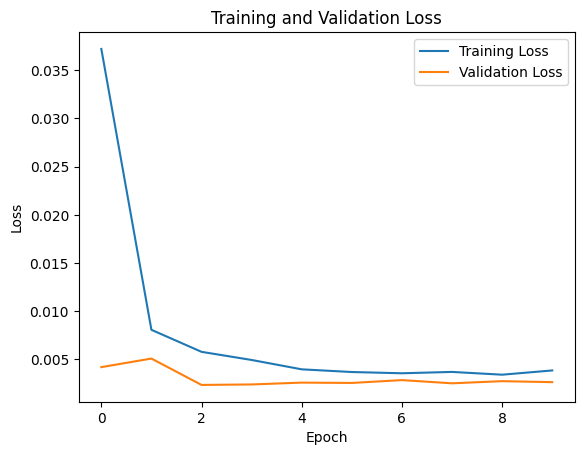

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
RMSE: 8.3893


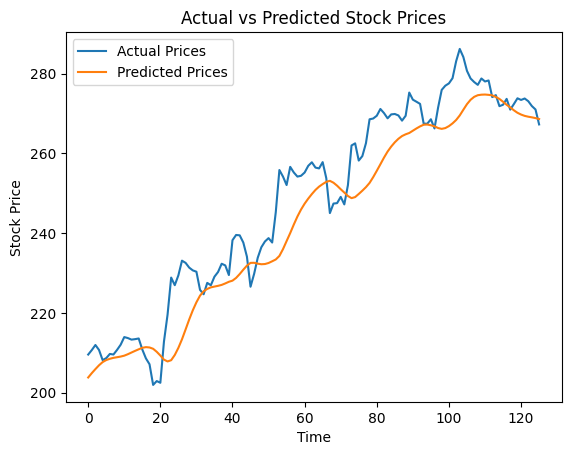

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted next day price: 268.14


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
# Download stock data (e.g., Apple)
ticker = "AAPL"
start_date = (datetime.now() - timedelta(days=1000)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')
data = yf.download(ticker, start=start_date, end=end_date)
# Use closing prices
prices = data['Close'].values.reshape(-1, 1)
# Normalize data
scaler = MinMaxScaler()
prices_normalized = scaler.fit_transform(prices)
# Create sequences
sequence_length = 60 # number of past days to use to predict the next day
X, y = [], []
for i in range(len(prices_normalized) - sequence_length):
    X.append(prices_normalized[i:i + sequence_length])
    y.append(prices_normalized[i + sequence_length])
X = np.array(X)
y = np.array(y)
# Split data (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])
# Compile model
model.compile(optimizer='adam', loss='mse')
# Train model

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# Make predictions on test set
y_pred = model.predict(X_test)
# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)
# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test_actual) ** 2))
print(f'RMSE: {rmse:.4f}')
# Plot predictions vs actuals
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
# Predict next day's price
last_sequence = prices_normalized[-sequence_length:].reshape(1, sequence_length, 1)
next_price = model.predict(last_sequence)
next_price = scaler.inverse_transform(next_price)[0, 0]
print(f'Predicted next day price: {next_price:.2f}')